In this report, we analyze an e-commerce dataset to perform customer segmentation using clustering techniques. Customer segmentation helps businesses to understand their customers better and tailor marketing and engagement strategies based on customer behavior. We will use the K-Means clustering algorithm to group customers based on their total sales, recency of purchase, and frequency of purchase.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
https://www.kaggle.com/datasets/vijayuv/onlineretail

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


The dataset used for this analysis is the Online Retail dataset, which contains transaction data for an online retail store. The dataset includes information on invoice date, stock codes, descriptions, quantities, unit prices, customer IDs, and country of purchase. The dataset contains 541,909 records and 8 columns. Our analysis will focus on customer-level data, which we will derive by aggregating transaction-level data.


# Data cleaning and preprocessing

In [4]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove cancelled orders
data = data[data['Quantity'] > 0]

# Calculate total sales for each transaction
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Calculate recency: days since the last purchase
snapshot_date = data['InvoiceDate'].max() + pd.to_timedelta(1, unit='D')
data['Recency'] = (snapshot_date - data['InvoiceDate']).dt.days

# Group data by CustomerID and calculate the sum of TotalSales and the mean of Recency
customer_data = data.groupby('CustomerID').agg({'TotalSales': 'sum', 'Recency': 'mean'})

# Calculate frequency: the number of purchases per customer
customer_frequency = data.groupby('CustomerID').size()
customer_data['Frequency'] = customer_frequency

We have cleaned and preprocessed the dataset by performing the following steps:

1. Converting the InvoiceDate column to datetime format.
2. Removing rows with missing CustomerID values.
3. Removing cancelled orders (i.e., rows with negative quantities).
4. Calculating the total sales for each transaction by multiplying the quantity and unit price.
5. Computing the recency (days since the last purchase) for each transaction.
6. Aggregating the data by CustomerID to calculate total sales, average recency, and purchase frequency for each customer.


# Descriptive statistics

In [5]:
print(customer_data.describe())

          TotalSales      Recency    Frequency
count    4339.000000  4339.000000  4339.000000
mean     2053.793018   155.655551    91.708689
std      8988.248381    90.104145   228.792852
min         0.000000     1.000000     1.000000
25%       307.245000    80.000000    17.000000
50%       674.450000   153.519288    41.000000
75%      1661.640000   213.000000   100.000000
max    280206.020000   374.000000  7847.000000


The descriptive statistics of the customer-level dataset are as follows:

- Include a summary table or the output of the `describe()` function.

These statistics provide insights into the distribution of total sales, recency, and frequency among the customers. This information will help us understand the different customer segments in our analysis.


# Data visualization

We have created the following visualizations to explore the relationships between the features and their distributions:

1. Histograms for Total Sales, Recency, and Frequency distributions.
2. Correlation heatmap showing the relationships between Total Sales, Recency, and Frequency.

These visualizations provide a preliminary understanding of the data and help identify patterns and trends that will be useful in the clustering analysis.


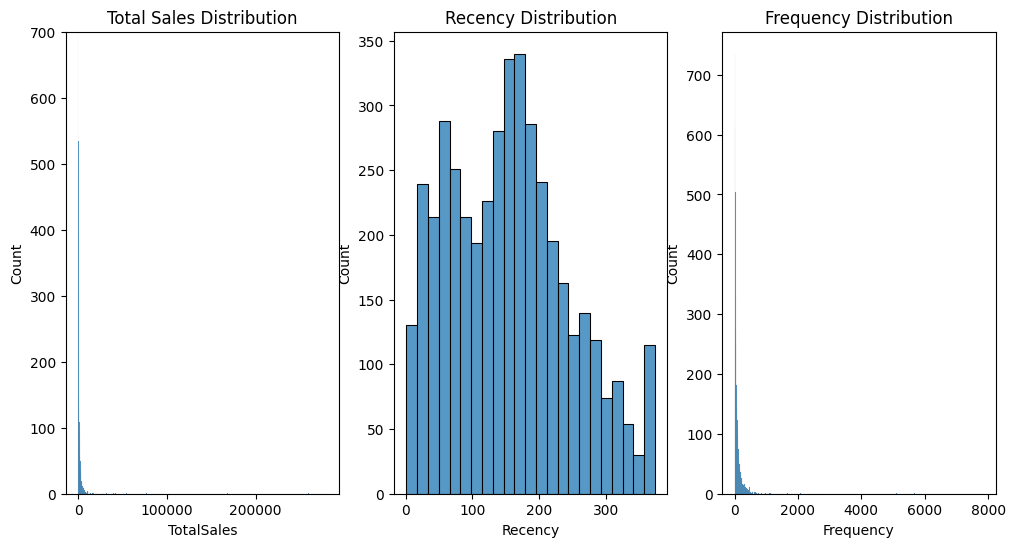

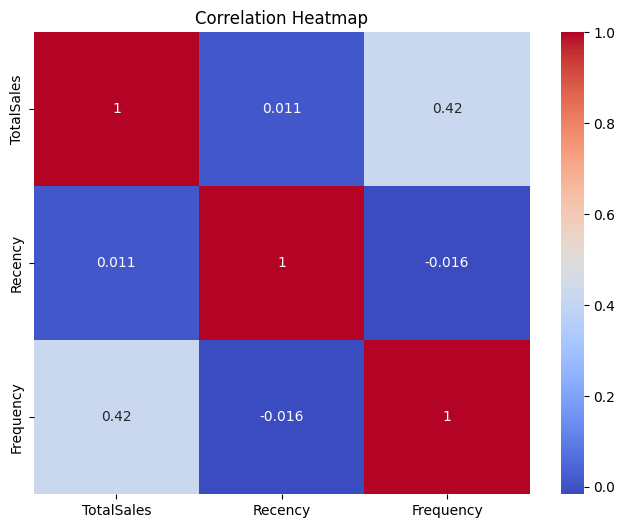

In [6]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.ylim(0,700)
plt.xlim()
sns.histplot(customer_data['TotalSales'])
plt.title('Total Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(customer_data['Recency'])
plt.title('Recency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(customer_data['Frequency'])
plt.title('Frequency Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature scaling

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['TotalSales', 'Recency', 'Frequency']])

#  Determine optimal number of clusters



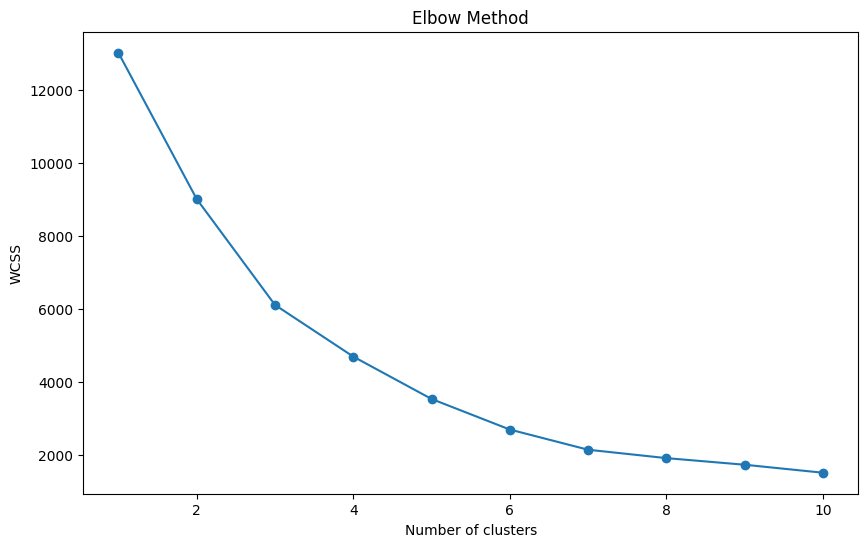

In [8]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

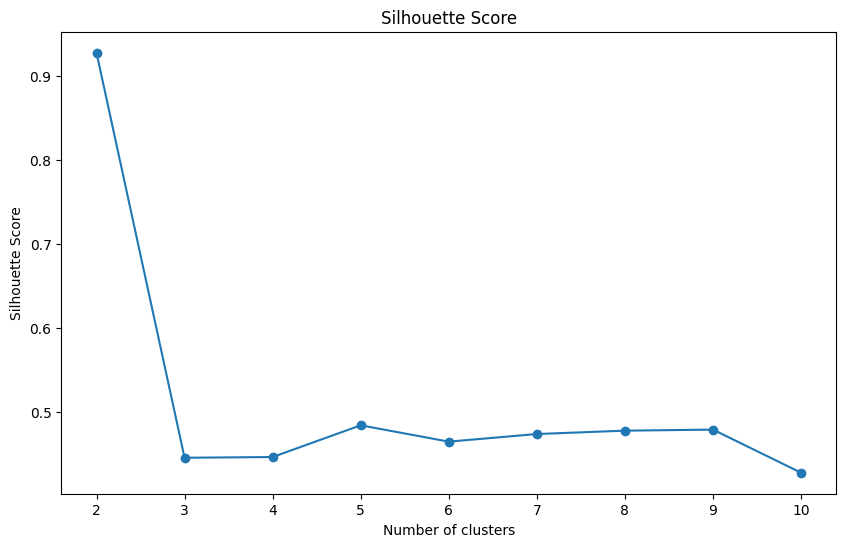

In [9]:
# Silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Apply clustering algorithm (e.g., K-Means)

To perform customer segmentation, we used the K-Means clustering algorithm. We determined the optimal number of clusters using the Elbow Method and Silhouette Score:

Based on these results, we chose 2 clusters for our analysis.


In [10]:
optimal_clusters = 2  # Choose based on Elbow Method or Silhouette Score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
customer_data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters

We analyzed the customer segments resulting from the K-Means clustering algorithm. The characteristics of each cluster are as follows:

We also visualized the clusters using scatter plots, which helped illustrate the differences between the customer segments based on Total Sales, Recency, and Frequency.

These visualizations and summary statistics provide valuable insights into the distinct customer segments

            TotalSales                 Recency                Frequency  \
                  mean      median        mean      median         mean   
Cluster                                                                   
0          1680.968533     668.845  155.684375  153.520016    84.273232   
1        126118.310000  117379.630  146.063708  153.519288  2566.000000   

                 
         median  
Cluster          
0          41.0  
1        1818.0  


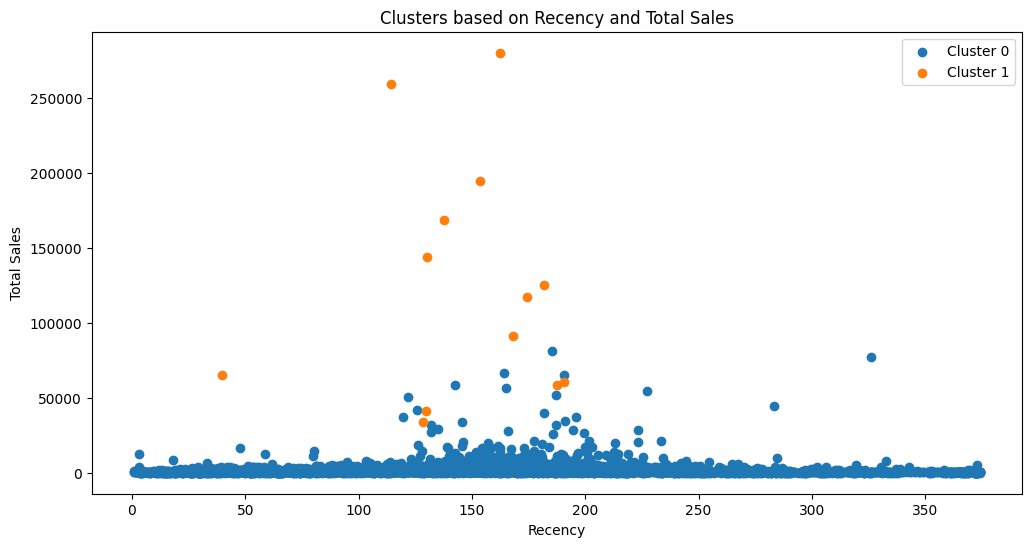

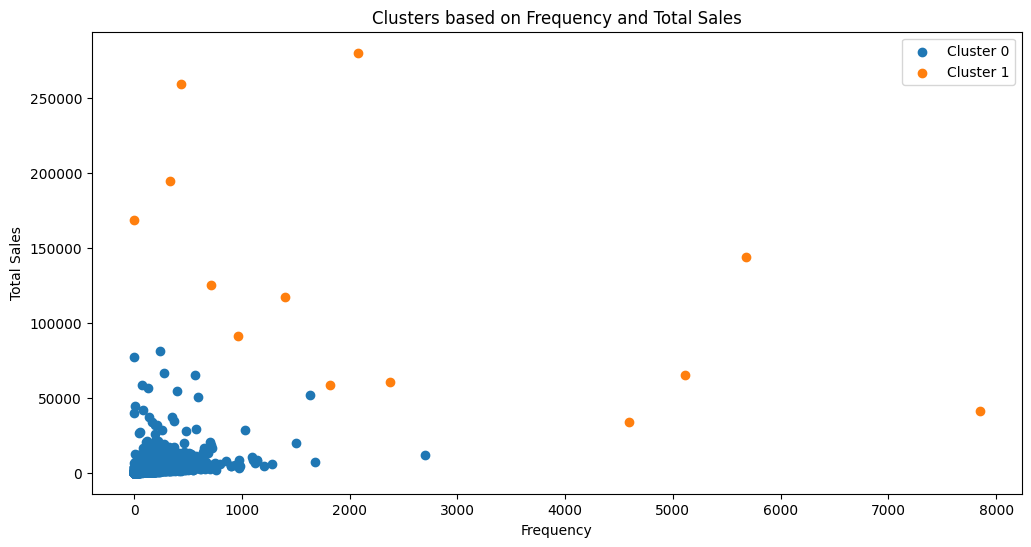

In [11]:
# Cluster statistics
print(customer_data.groupby('Cluster').agg({'TotalSales': ['mean', 'median'],
                                            'Recency': ['mean', 'median'],
                                            'Frequency': ['mean', 'median']}))

# Visualize clusters using scatter plots
plt.figure(figsize=(12, 6))
plt.scatter(customer_data['Recency'][customer_data['Cluster'] == 0],
            customer_data['TotalSales'][customer_data['Cluster'] == 0],
            label='Cluster 0')
plt.scatter(customer_data['Recency'][customer_data['Cluster'] == 1],
            customer_data['TotalSales'][customer_data['Cluster'] == 1],
            label='Cluster 1')
plt.xlabel('Recency')
plt.ylabel('Total Sales')
plt.title('Clusters based on Recency and Total Sales')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(customer_data['Frequency'][customer_data['Cluster'] == 0],
            customer_data['TotalSales'][customer_data['Cluster'] == 0],
            label='Cluster 0')
plt.scatter(customer_data['Frequency'][customer_data['Cluster'] == 1],
            customer_data['TotalSales'][customer_data['Cluster'] == 1],
            label='Cluster 1')
plt.xlabel('Frequency')
plt.ylabel('Total Sales')
plt.title('Clusters based on Frequency and Total Sales')
plt.legend()
plt.show()


Our analysis using the K-Means clustering algorithm resulted in two distinct customer segments. The characteristics of each cluster are summarized as follows:

Cluster 0:
- Average Total Sales: 1,680.97
- Median Total Sales: 668.85
- Average Recency: 155.68 days
- Median Recency: 153.52 days
- Average Frequency: 84.27 purchases
- Median Frequency: 41 purchases

Cluster 1:
- Average Total Sales: 126,118.31
- Median Total Sales: 117,379.63
- Average Recency: 146.06 days
- Median Recency: 153.52 days
- Average Frequency: 2,566 purchases
- Median Frequency: 1,818 purchases

Based on these results, we can make the following recommendations for the e-commerce platform:

1. Cluster 0 represents the majority of customers who generate moderate sales, have a relatively recent purchase, and a lower frequency of purchases. Marketing strategies for this segment could include personalized email campaigns, targeted promotions, and loyalty programs to encourage repeat purchases and increase customer engagement.

2. Cluster 1 consists of high-value customers with significantly higher total sales and purchase frequency. This segment is crucial to the platform's revenue and should be prioritized with exclusive offers, personalized customer service, and early access to new products and promotions. Regular communication with these customers is vital to maintain their interest and loyalty.

This analysis provides valuable insights into the different customer segments on the e-commerce platform, enabling tailored marketing strategies and improved customer engagement. However, there are limitations to the clustering approach, such as the assumption of spherical and equally-sized clusters. Further analysis could explore alternative clustering algorithms, additional features, or dynamic segmentation methods to refine the customer segments and recommendations.

Additionally, it is essential to monitor the performance of the implemented strategies and adjust them as needed based on customer feedback and changing market conditions.
